## Step 0: Importing Libraries and CSV file

In [1]:
# Importing libraries to handle data
import pandas as pd
import numpy as np

# Importing libraries for graph plottings
import matplotlib.pyplot as plt

import scipy
from scipy.stats import ttest_1samp
# From scipy import stats-related libraries
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from statistics import mean

# Importing Linear Regression
from sklearn.linear_model import LinearRegression
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# Importing libraries for creating pipeline
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None,'display.max_row', None)

In [2]:
#Read CSV
df=pd.read_csv("unifed_csv.csv")

#df.info()

df.insert(30, 'average_job_duration', df['job_duration'].divide(df['num_exec']))

#df['average_job_duration'] = pd.DataFrame(df['job_duration'] / df['num_exec'])


df = df.replace([np.inf, -np.inf], np.nan)
df['average_job_duration'] = df['average_job_duration'].fillna(0)


df['average_job_duration'].apply(lambda x: round(float(x),6))

df.drop(columns=['job_duration'],inplace = True)
df.info(max_cols=1000)

#loc, column, value, allow_duplicates=False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3274 entries, 0 to 3273
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 3274 non-null   object 
 1   status                                       3274 non-null   object 
 2   num_funding_rounds                           3274 non-null   float64
 3   total_funding_usd                            3274 non-null   float64
 4   founded_on                                   3274 non-null   float64
 5   employee_count                               3274 non-null   object 
 6   cat_pca_0                                    3274 non-null   float64
 7   cat_pca_1                                    3274 non-null   float64
 8   cat_pca_2                                    3274 non-null   float64
 9   cat_pca_3                                    3274 non-null   float64
 10  

In [3]:
df['employee_count'].value_counts()

def mapping (col):
    if col == "1-10":
        return 1
    elif col == "11-50":
        return 2
    elif col == "51-100":
        return 3
    elif col == "101-250":
        return 4
    elif col == "251-500":
        return 5
    elif col == "501-1000":
        return 6
    elif col == "10000+":
        return 7
    else:
        return 0

df['employee_count'] = df['employee_count'].apply(mapping)

best_4000 = df

## Step 1.1: Predicting closed / not closed / success using logistic regression

In [4]:
y = df['status_closed']
X = df.iloc[:,5:88]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on predicting closed company: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


# Drop away all closed companies, avoid false positive
pred_arr = logreg.predict(df.iloc[:,5:88])
to_be_dropped = []
for i in range(len(df)):
    if pred_arr[i] == 1:
       to_be_dropped.append(i)
df.drop(to_be_dropped, inplace = True)
df = df.reset_index(drop = True)

Accuracy of logistic regression classifier on predicting closed company: 0.97
[[951   0]
 [ 32   0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       951
           1       0.00      0.00      0.00        32

    accuracy                           0.97       983
   macro avg       0.48      0.50      0.49       983
weighted avg       0.94      0.97      0.95       983



## Step 1.2: Predicting those above 50% threshold of average momentum using logistic regression

In [5]:
X = df.iloc[:,5:88]
y2 = df['average_momentum']
y2_threshold = np.percentile(y2, [50])
y2 = y2.apply(lambda x: 1 if x >= y2_threshold else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on av_momentum with 50% as threshold: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


# Drop away all companies below threshold using av_momentum as predictor, avoid false positive
pred_arr = logreg.predict(df.iloc[:,5:88])
to_be_dropped = []
for i in range(len(df)):
    if pred_arr[i] == 0:
       to_be_dropped.append(i)
df.drop(to_be_dropped, inplace = True)
df = df.reset_index(drop = True)

Accuracy of logistic regression classifier on av_momentum with 50% as threshold: 0.48
[[454  37]
 [471  21]]
              precision    recall  f1-score   support

           0       0.49      0.92      0.64       491
           1       0.36      0.04      0.08       492

    accuracy                           0.48       983
   macro avg       0.43      0.48      0.36       983
weighted avg       0.43      0.48      0.36       983



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 176 non-null    object 
 1   status                                       176 non-null    object 
 2   num_funding_rounds                           176 non-null    float64
 3   total_funding_usd                            176 non-null    float64
 4   founded_on                                   176 non-null    float64
 5   employee_count                               176 non-null    int64  
 6   cat_pca_0                                    176 non-null    float64
 7   cat_pca_1                                    176 non-null    float64
 8   cat_pca_2                                    176 non-null    float64
 9   cat_pca_3                                    176 non-null    float64
 10  ca

In [7]:
#Preparing xlabel and ylabel
features= df.iloc[:,0:88]

ylabel=df[["average_momentum"]]


In [8]:
# #print value_counts of each column of features dataframe
# for i in features.columns: 
#     x= features[i].value_counts()
#     print("column: ",i,", value is:",x)
#     print()

In [9]:
# #print value_counts of each column of ylabel dataframe
# for i in ylabel.columns: 
#     x= ylabel[i].value_counts()
#     print("column: ",i,", value is:",x)
#     print()

In [10]:
###### Split ylabels values into 0 and 1 ####### 

binary_labels = [0,1]

ylabel["average_momentum"]= pd.qcut(ylabel["average_momentum"], 2, labels = binary_labels)

In [12]:
#Train model to predict each ylabel

X_train, X_test, y_train, y_test = train_test_split(features.drop(columns=['company_name', 'status', 'category_groups_list', 'num_funding_rounds','total_funding_usd']), ylabel["average_momentum"], test_size=0.3, random_state=5)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
    
# use the trained model to predict test set for evaluation
pred_test = model.predict(X_test)

# print out evaluation result
print("Predicting: ", i)
    
print("Accuracy:{}".format(accuracy_score(y_test, pred_test, normalize=True, sample_weight=None)))
print("Classification Report:\n{}".format(classification_report(y_test, pred_test)))
print("Confusion Matrix:\n{}".format(confusion_matrix(y_test, pred_test)))
print("--------------------------------------------------------------------------")
prediction=model.predict(features.drop(columns=['company_name', 'status', 'category_groups_list', 'num_funding_rounds','total_funding_usd']))
result = features
result["tree_prediction"]=prediction

KeyError: "['category_groups_list'] not found in axis"

In [12]:
result["average_momentum"]= df["average_momentum"]
result= result.reset_index()
result= result.drop(columns= ["index"])
#result.head()

## Step 2: Predicting those above 50% threshold of average momentum by Decision Tree

In [13]:
# Drop away those below median as the average momentum threshold, predicted by decision tree
# Double Confirmation of NO FALSE POSITIVE
to_be_dropped = []
for i in range (len(result)):
    if result['tree_prediction'].iloc[i] == 0:
        to_be_dropped.append(i)
result.drop(to_be_dropped, inplace = True)
result = result.reset_index(drop = True)

In [14]:
df = result
#df.info()

## Step 3: Predicting the best momentum venture companies by Polynomial Regression

Accuracy Score of Degree 2 model:  0.5774808269114835


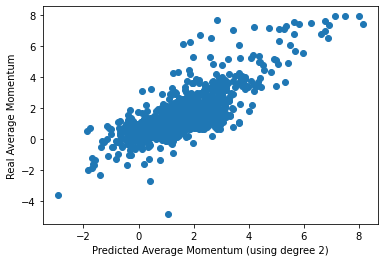

In [15]:
# ###### Degree 2 Polynomial regression #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=2)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
print("Accuracy Score of Degree 2 model: ", pr_model.score(x_poly, y))
# # Store our predicted ROI values in the variable y_pred
y_pred_2 = pr_model.predict(x_poly)


# # Plot our model on our data
plt.scatter(y_pred_2, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 2)")
plt.ylabel("Real Average Momentum")
plt.show()

Accuracy Score of Degree 3 model:  0.21537032524759048


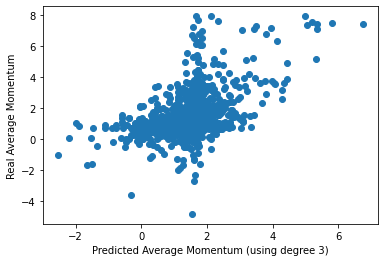

In [16]:
# ###### Degree 2 Polynomial regression #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=3)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
print("Accuracy Score of Degree 3 model: ", pr_model.score(x_poly, y))
# # Store our predicted ROI values in the variable y_pred
y_pred_3 = pr_model.predict(x_poly)


# # Plot our model on our data
plt.scatter(y_pred_3, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 3)")
plt.ylabel("Real Average Momentum")
plt.show()

## Step 4: Rank the predicted momentum values

In [17]:
df['predicted_momentum_using_degree_2'] = y_pred_2
df = df.sort_values(by='predicted_momentum_using_degree_2', ascending=False)

In [18]:
df = df.reset_index(drop = True)
#df = df[(df['founded_on'] <=5)]

## Step 5: Extract the top 100 companies to a CSV file

In [19]:
#df.head()

In [20]:
best_100 = df.iloc[:100]
output_best_100 = best_100.loc[:,['company_name','employee_count','num_funding_rounds','fd_rd_latest_investment','cat_lending_invests','cat_payments','cat_commerce_shopping','first_fund_investor_count','first_fund_post_money','num_exec','fd_rd_num_invested_by_top_100','average_momentum']]
output_best_100.to_csv("predicted_best_100.csv", index=False)
output_all = df.loc[:,['company_name','employee_count','num_funding_rounds','fd_rd_latest_investment','cat_lending_invests','cat_payments','cat_commerce_shopping','first_fund_investor_count','first_fund_post_money','num_exec','fd_rd_num_invested_by_top_100','average_momentum']]
output_all.to_csv("all_validated_companies_ranked.csv", index=False)

## Step 6: Explaining Important Features

In [21]:
"""
x = best_100.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_100_scaled = pd.DataFrame(x_scaled)


x = best_1300.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_1300_scaled = pd.DataFrame(x_scaled)


x = best_4000.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_4000_scaled = pd.DataFrame(x_scaled)
"""



'\nx = best_100.values \nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x)\nbest_100_scaled = pd.DataFrame(x_scaled)\n\n\nx = best_1300.values \nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x)\nbest_1300_scaled = pd.DataFrame(x_scaled)\n\n\nx = best_4000.values \nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x)\nbest_4000_scaled = pd.DataFrame(x_scaled)\n'

In [22]:
best_100 = best_100.iloc[:,6:-3]
best_1300 = df.iloc[:,6:-3]
best_4000 = best_4000.iloc[:,6:-8]
best_100.head()

index = best_100.columns.get_loc('average_job_duration')
print("av job of best 100: ", best_100.iloc[:,index].mean())
print("av job of best 1300: ", best_1300.iloc[:,index].mean())
print("av job of best 4000: ", best_4000.iloc[:,index].mean())



av job of best 100:  4.208244714970488
av job of best 1300:  4.434324560726092
av job of best 4000:  4.648637417498196


In [23]:
"""
# Not Normalized Values

for i in range (len(best_100.columns)):
    if best_100.iloc[:,i].mean() > best_1300.iloc[:,i].mean() \
    and best_100.iloc[:,i].mean() > best_4000.iloc[:,i].mean() \
    and best_1300.iloc[:,i].mean() > best_4000.iloc[:,i].mean():
        print(str(best_100.columns[i])+" is a positively important feature !\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")
"""

'\n# Not Normalized Values\n\nfor i in range (len(best_100.columns)):\n    if best_100.iloc[:,i].mean() > best_1300.iloc[:,i].mean()     and best_100.iloc[:,i].mean() > best_4000.iloc[:,i].mean()     and best_1300.iloc[:,i].mean() > best_4000.iloc[:,i].mean():\n        print(str(best_100.columns[i])+" is a positively important feature !\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")\n'

In [24]:
x = best_100.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_100_scaled = pd.DataFrame(x_scaled)


x = best_1300.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_1300_scaled = pd.DataFrame(x_scaled)


x = best_4000.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_4000_scaled = pd.DataFrame(x_scaled)

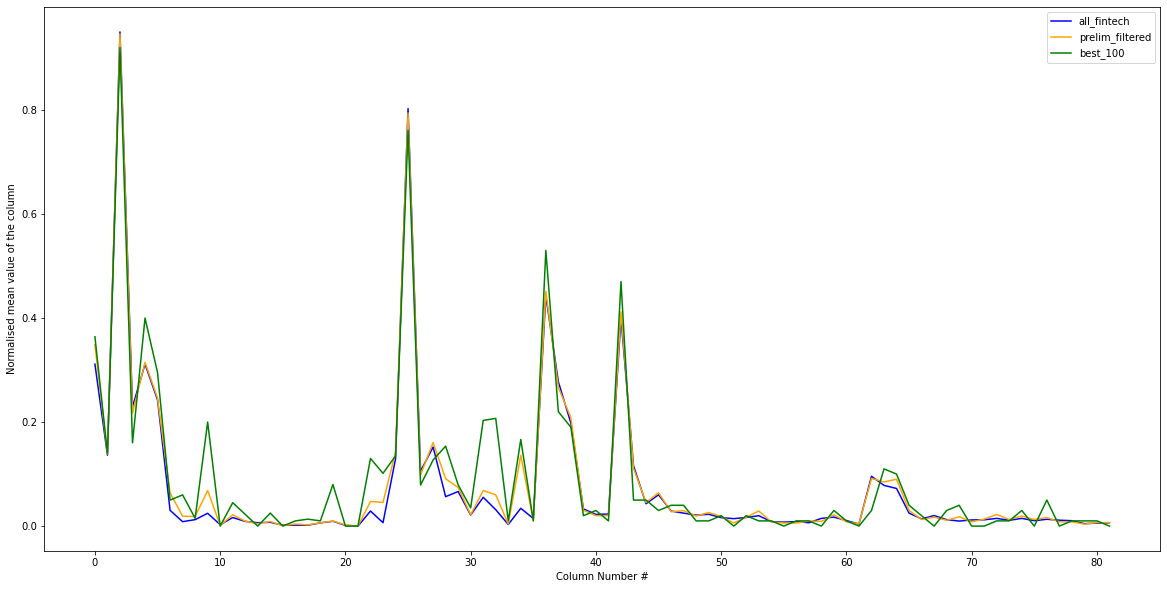

In [25]:
best_100_scaled_mean = []
for i in range(len(best_100_scaled.columns)):
    best_100_scaled_mean.append(best_100_scaled.iloc[:,i].mean())\

best_1300_scaled_mean = []
for i in range(len(best_1300_scaled.columns)):
    best_1300_scaled_mean.append(best_1300_scaled.iloc[:,i].mean())

best_4000_scaled_mean = []
for i in range(len(best_4000_scaled.columns)):
    best_4000_scaled_mean.append(best_4000_scaled.iloc[:,i].mean())

plt.figure(figsize=(20,10))
plt.plot(best_100_scaled.columns.to_list(), best_4000_scaled_mean, color='blue', label='all_fintech')
plt.plot(best_100_scaled.columns.to_list(), best_1300_scaled_mean, color='orange', label='prelim_filtered')
plt.plot(best_100_scaled.columns.to_list(), best_100_scaled_mean, color='green', label='best_100')
plt.xlabel("Column Number #")
plt.ylabel("Normalised mean value of the column")
plt.legend()
plt.show()

In [26]:
sorted_df = pd.DataFrame([best_4000_scaled_mean, best_1300_scaled_mean, best_100_scaled_mean], columns=list(best_100.columns.values))
sorted_df.head()

,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,average_job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid
0,0.311429,0.136296,0.950123,0.229136,0.311358,0.242540,0.030281,0.008477,0.012412,0.024599,0.002765,0.01642,0.009012,0.006502,0.007243,0.001728,0.001811,0.001646,0.006173,0.00930,0.001358,0.0,0.028981,0.006507,0.129247,0.802634,0.105515,0.152049,0.056601,0.066461,0.021219,0.055378,0.031537,0.003101,0.034231,0.014568,0.442469,0.277531,0.197778,0.033086,0.022469,0.023210,0.399506,0.116049,0.042963,0.060247,0.028889,0.024938,0.020988,0.022716,0.016296,0.014321,0.016543,0.020000,0.008642,0.007654,0.008642,0.00642,0.014815,0.017284,0.010617,0.003951,0.095802,0.078272,0.072346,0.024938,0.013827,0.020247,0.012346,0.00963,0.011852,0.012099,0.014815,0.011111,0.014815,0.010370,0.013086,0.011358,0.010370,0.004691,0.005679,0.006420
1,0.348598,0.138496,0.946389,0.217424,0.314966,0.245931,0.064036,0.018987,0.018509,0.068317,0.001303,0.02178,0.009531,0.004468,0.008749,0.000745,0.003971,0.002234,0.006329,0.00968,0.002234,0.0,0.047282,0.045552,0.142188,0.794281,0.098496,0.160767,0.090983,0.074160,0.021956,0.068413,0.060040,0.003940,0.136122,0.010424,0.451229,0.266567,0.208488,0.030529,0.020104,0.020104,0.411765,0.110946,0.045421,0.064036,0.027550,0.029784,0.019360,0.026061,0.018615,0.005957,0.017126,0.029039,0.008191,0.005957,0.005957,0.00968,0.008935,0.021593,0.008191,0.004468,0.091586,0.084885,0.090097,0.029784,0.012658,0.017126,0.011169,0.01787,0.008191,0.013403,0.022338,0.012658,0.019360,0.012658,0.016381,0.008191,0.008191,0.003723,0.006701,0.006701
2,0.364000,0.140000,0.920000,0.160000,0.400000,0.295000,0.050000,0.060000,0.015000,0.200000,0.000000,0.04500,0.022500,0.000000,0.025000,0.000000,0.010000,0.013333,0.010000,0.08000,0.000000,0.0,0.130000,0.101429,0.134939,0.761072,0.078928,0.127111,0.153656,0.079244,0.035132,0.203182,0.207081,0.010000,0.166563,0.010000,0.530000,0.220000,0.190000,0.020000,0.030000,0.010000,0.470000,0.050000,0.050000,0.030000,0.040000,0.040000,0.010000,0.010000,0.020000,0.000000,0.020000,0.010000,0.010000,0.000000,0.010000,0.01000,0.000000,0.030000,0.010000,0.000000,0.030000,0.110000,0.100000,0.040000,0.020000,0.000000,0.030000,0.04000,0.000000,0.000000,0.010000,0.010000,0.030000,0.000000,0.050000,0.000000,0.010000,0.010000,0.010000,0.000000


In [27]:
sorted_df.sort_values(by=0, axis=1, ascending=False, inplace=True)
sorted_df.head()

,cat_fin_services,gender_male,continent_NA,country_code_USA,employee_count,cat_payments,continent_EU,fd_rd_latest_investment,cat_lending_invests,continent_AS,degree_type,cat_commerce_shopping,average_job_duration,country_code_GBR,gender_female,city_London,city_New York,city_San Francisco,subject_STEM,country_code_CHN,subject_Business,num_exec,country_code_IND,first_fund_investor_count,continent_SA,first_fund_raised,fd_rd_investment_type_series_unknown,fd_rd_num_invested_by_top_100,country_code_CAN,city_Singapore,country_code_SGP,fd_rd_investment_type_pre_seed,continent_OC,country_code_DEU,continent_AF,subject_Arts_SoSc,country_code_AUS,city_Beijing,country_code_FRA,country_code_JPN,country_code_ESP,fd_rd_investment_type_convertible_note,country_code_BRA,country_code_SWE,city_Paris,city_Tokyo,has_parent,country_code_CHE,city_Toronto,city_Boston,fd_rd_investment_type_debt_financing,city_Mumbai,city_Sydney,city_Chicago,city_Stockholm,city_São Paulo,country_code_MEX,city_Berlin,city_Shanghai,city_Los Angeles,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_equity_crowdfunding,country_code_ISR,country_code_NLD,fd_rd_investment_type_grant,country_code_HKG,fd_rd_investment_type_undisclosed,event_count,fd_rd_investment_type_private_equity,country_code_KOR,city_Madrid,fd_rd_investment_type_non_equity_assistance,city_Amsterdam,city_Tel Aviv,country_code_IDN,first_fund_post_money,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_corporate_round,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary
0,0.950123,0.802634,0.442469,0.399506,0.311429,0.311358,0.277531,0.242540,0.229136,0.197778,0.152049,0.136296,0.129247,0.116049,0.105515,0.095802,0.078272,0.072346,0.066461,0.060247,0.056601,0.055378,0.042963,0.034231,0.033086,0.031537,0.030281,0.028981,0.028889,0.024938,0.024938,0.024599,0.023210,0.022716,0.022469,0.021219,0.020988,0.020247,0.020000,0.017284,0.016543,0.01642,0.016296,0.014815,0.014815,0.014815,0.014568,0.014321,0.013827,0.013086,0.012412,0.012346,0.012099,0.011852,0.011358,0.011111,0.010617,0.010370,0.010370,0.00963,0.00930,0.009012,0.008642,0.008642,0.008477,0.007654,0.007243,0.006507,0.006502,0.00642,0.006420,0.006173,0.005679,0.004691,0.003951,0.003101,0.002765,0.001811,0.001728,0.001646,0.001358,0.0
1,0.946389,0.794281,0.451229,0.411765,0.348598,0.314966,0.266567,0.245931,0.217424,0.208488,0.160767,0.138496,0.142188,0.110946,0.098496,0.091586,0.084885,0.090097,0.074160,0.064036,0.090983,0.068413,0.045421,0.136122,0.030529,0.060040,0.064036,0.047282,0.027550,0.029784,0.029784,0.068317,0.020104,0.026061,0.020104,0.021956,0.019360,0.017126,0.029039,0.021593,0.017126,0.02178,0.018615,0.008935,0.022338,0.019360,0.010424,0.005957,0.012658,0.016381,0.018509,0.011169,0.013403,0.008191,0.008191,0.012658,0.008191,0.012658,0.008191,0.01787,0.00968,0.009531,0.005957,0.008191,0.018987,0.005957,0.008749,0.045552,0.004468,0.00968,0.006701,0.006329,0.006701,0.003723,0.004468,0.003940,0.001303,0.003971,0.000745,0.002234,0.002234,0.0
2,0.920000,0.761072,0.530000,0.470000,0.364000,0.400000,0.220000,0.295000,0.160000,0.190000,0.127111,0.140000,0.134939,0.050000,0.078928,0.030000,0.110000,0.100000,0.079244,0.030000,0.153656,0.203182,0.050000,0.166563,0.020000,0.207081,0.050000,0.130000,0.040000,0.040000,0.040000,0.200000,0.010000,0.010000,0.030000,0.035132,0.010000,0.000000,0.010000,0.030000,0.020000,0.04500,0.020000,0.000000,0.010000,0.030000,0.010000,0.000000,0.020000,0.050000,0.015000,0.030000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.010000,0.04000,0.08000,0.022500,0.010000,0.010000,0.060000,0.000000,0.025000,0.101429,0.000000,0.01000,0.000000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.000000,0.013333,0.000000,0.0


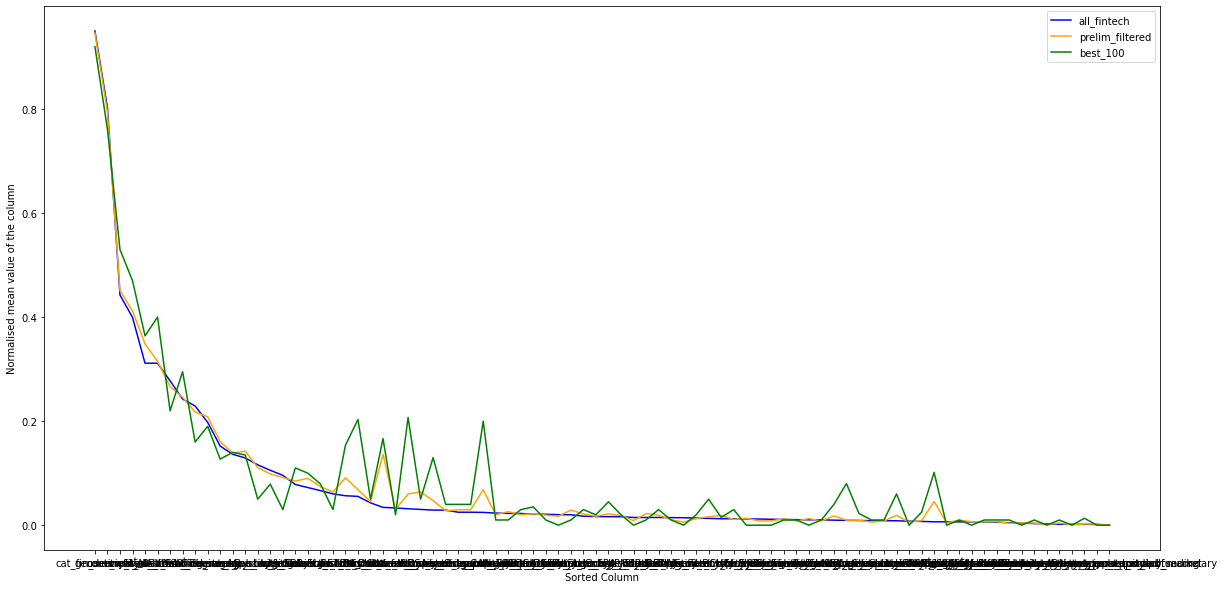

In [28]:
plt.figure(figsize=(20,10))
plt.plot(sorted_df.iloc[0].index.to_list(), list(sorted_df.iloc[0]), color='blue', label='all_fintech')
plt.plot(sorted_df.iloc[0].index.to_list(), list(sorted_df.iloc[1]), color='orange', label='prelim_filtered')
plt.plot(sorted_df.iloc[0].index.to_list(), list(sorted_df.iloc[2]), color='green', label='best_100')
plt.xlabel("Sorted Column")
plt.ylabel("Normalised mean value of the column")
plt.legend()
plt.show()

In [29]:
stat_useful = []

for i in range(len(best_100.columns)):
    feature_mean = best_4000.iloc[:, i].mean()
    tset, pval = ttest_1samp(best_100.iloc[:, i].values, feature_mean)
    
    if pval < 0.05:    # alpha value is 0.05 or 5%
        # only print rejected
        print("Rejecting null hypothesis for " + str(best_100.columns[i]))
        #stat_useful.append(df.columns[i])
        print("Feature mean for all: " + str(feature_mean))
        print("Feature mean for TOP 100: " + str(best_100.iloc[:, i].mean()))
        print('p-values',pval,'\n')
    # else:
    #     print("we are accepting null hypothesis")

Rejecting null hypothesis for employee_count
Feature mean for all: 2.18
Feature mean for TOP 100: 1.82
p-values 0.00028777605751756396 

Rejecting null hypothesis for fd_rd_latest_investment
Feature mean for all: 1.6977777777777778
Feature mean for TOP 100: 1.18
p-values 5.0301925021274216e-11 

Rejecting null hypothesis for fd_rd_investment_type_series_unknown
Feature mean for all: 0.3330864197530864
Feature mean for TOP 100: 0.1
p-values 4.485711179077772e-09 

Rejecting null hypothesis for fd_rd_investment_type_debt_financing
Feature mean for all: 0.18617283950617283
Feature mean for TOP 100: 0.03
p-values 2.914155105049075e-10 

Rejecting null hypothesis for fd_rd_investment_type_pre_seed
Feature mean for all: 0.19679012345679012
Feature mean for TOP 100: 0.4
p-values 0.0005447507907197556 

Rejecting null hypothesis for fd_rd_investment_type_post_ipo_equity
Feature mean for all: 0.013827160493827161
Feature mean for TOP 100: 0.0
p-values 0.0 

Rejecting null hypothesis for fd_rd_i

In [30]:
# Normalised Values here, see positive relationships

for i in range (len(best_100.columns)):
    if best_100.iloc[:,i].mean() > best_1300.iloc[:,i].mean() \
    and best_100.iloc[:,i].mean() > best_4000.iloc[:,i].mean() \
    and best_1300.iloc[:,i].mean() > best_4000.iloc[:,i].mean():
        print(str(best_100.columns[i])+" is a positively important feature !\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")

cat_commerce_shopping is a positively important feature !
The average value at TOP 100: 0.14;
while the average value at Prelim Filtered: 0.13849590469099032;
and that the average value at All Fintech: 0.1362962962962963

cat_payments is a positively important feature !
The average value at TOP 100: 0.4;
while the average value at Prelim Filtered: 0.3149664929262844;
and that the average value at All Fintech: 0.31135802469135804

fd_rd_investment_type_pre_seed is a positively important feature !
The average value at TOP 100: 0.4;
while the average value at Prelim Filtered: 0.2732688011913626;
and that the average value at All Fintech: 0.19679012345679012

fd_rd_investment_type_product_crowdfunding is a positively important feature !
The average value at TOP 100: 0.04;
while the average value at Prelim Filtered: 0.006701414743112435;
and that the average value at All Fintech: 0.0049382716049382715

fd_rd_num_invested_by_top_100 is a positively important feature !
The average value at TO

In [31]:
# Normalised Values here, see inverse relationships

for i in range (len(best_100.columns)):
    if best_100.iloc[:,i].mean() < best_1300.iloc[:,i].mean() \
    and best_100.iloc[:,i].mean() < best_4000.iloc[:,i].mean() \
    and best_1300.iloc[:,i].mean() < best_4000.iloc[:,i].mean() and best_100.iloc[:,i].mean() != 0:
        print(str(best_100.columns[i])+" is an inversely important feature!\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")

employee_count is an inversely important feature!
The average value at TOP 100: 1.82;
while the average value at Prelim Filtered: 2.0915860014892034;
and that the average value at All Fintech: 2.18

cat_fin_services is an inversely important feature!
The average value at TOP 100: 0.92;
while the average value at Prelim Filtered: 0.9463886820551005;
and that the average value at All Fintech: 0.9501234567901234

cat_lending_invests is an inversely important feature!
The average value at TOP 100: 0.16;
while the average value at Prelim Filtered: 0.21742367833209233;
and that the average value at All Fintech: 0.2291358024691358

fd_rd_investment_type_series_unknown is an inversely important feature!
The average value at TOP 100: 0.1;
while the average value at Prelim Filtered: 0.1921072226358898;
and that the average value at All Fintech: 0.3330864197530864

fd_rd_investment_type_grant is an inversely important feature!
The average value at TOP 100: 0.06;
while the average value at Prelim 

In [32]:
# Take STEM as an example...
index = best_100.columns.get_loc('subject_STEM')
print("Subject STEM of best 100: ", best_100.iloc[:,index].mean())
print("Subject STEM of best 1300: ", best_1300.iloc[:,index].mean())
print("Subject STEM of best 4000: ", best_4000.iloc[:,index].mean())

# Therefore, STEM is regarded as positively important here. Since it has a consistantly
# larger ratio over each of the comparison

Subject STEM of best 100:  0.15848892610657317
Subject STEM of best 1300:  0.1483194598892423
Subject STEM of best 4000:  0.1329214675633156


In [33]:
df.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,average_job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid,tree_prediction,average_momentum,predicted_momentum_using_degree_2
0,Betmatch,operating,Unknown,2.0,4150000.0,2.9671,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.904100,1.000,0.000,2.000,0.00,0.000,1.0,1.0,4150000.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.442526,8.126155
1,Beatdapp,operating,Unknown,4.0,2421799.0,3.0767,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.372262,0.875,0.125,0.625,0.25,0.125,0.0,8.0,2419299.0,0.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.920122,7.996488
2,Mobius,operating,"Apps,Financial Services,Payments,Software",2.0,39500000.0,4.0767,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,5.994525,1.000,0.000,0.250,0.00,0.250,0.0,4.0,500000.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.904976,7.478680
3,BrikkApp,operating,"Commerce and Shopping,Financial Services,Other...",2.0,542698.0,3.0767,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000,0.000,0.000,0.00,0.000,0.0,0.0,539388.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.921425,7.141059
4,Yotta Savings,operating,Financial Services,2.0,3425000.0,1.3288,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.994500,1.000,0.000,0.000,0.00,0.000,0.0,2.0,3425000.0,0.0,8.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.354282,6.925997


## The End -